### Add libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
import numpy as np
import math
import ast

# Merge all Optimizations



### Fun 01: Add percentages for vehicles stats

In [8]:
def calculate_percentages_from_vehicles(gdf_vehicles):
    age_cols = ["A_0_15", "A_15_25", "A_25_45", "A_45_65", "A_65+"]
    for col in age_cols:
        pct_col = f"P_{col.split('_')[1]}" if col != "A_65+" else "P_65+"
        gdf_vehicles[pct_col] = (gdf_vehicles[col] / gdf_vehicles["A_inhab"] * 100).round(2)

    mig_map = {
        "A_nederlan": "P_nederlan",
        "A_west_mig": "P_west_mig",
        "A_n_west_m": "P_n_west_m"
    }
    for a_col, p_col in mig_map.items():
        gdf_vehicles[p_col] = (gdf_vehicles[a_col] / gdf_vehicles["A_inhab"] * 100).round(2)

    gdf_vehicles.rename(columns={
        'P_0': 'P_0_15', 'P_15': 'P_15_25',
        'P_25': 'P_25_45', 'P_45': 'P_45_65',
        'P_65+': 'P_65+'
    }, inplace=True)

    cols = [c for c in gdf_vehicles.columns if c != 'geometry'] + ['geometry']
    return gdf_vehicles[cols]


### Fun 02: Create Random Vehicles

In [42]:
def select_random_vehicles(gdf, n=10, seed=None):
    df = gdf.sample(n=n, random_state=seed)[['uni_id']].reset_index(drop=True)
    df.rename(columns={'uni_id': 'random'}, inplace=True)
    return df


#### Exports Maximal

#### Merge all max + fair vehicles + fair maximum GVB Amsterdam 15.03. 24 hours

In [48]:
# STEP 2 ADD EACH IN ONE NICE DATAFRAME

max_space_vehicles = pd.read_csv('data/optimized_spatial_1503.csv') 
max_pop_vehicles = pd.read_csv('data/optimized_pop_count_1503.csv')
fair_vehicles = pd.read_csv('data/optimized_fairness_1503.csv') 
combined_vehicles = pd.read_csv('data/optimized_combined_1503.csv')
random_vehicles = select_random_vehicles(gdf, n=10)

In [52]:
combined_df = pd.concat([max_space_vehicles, max_pop_vehicles, fair_vehicles, combined_vehicles, random_vehicles ], axis=1)
#combined_df.to_csv('data/combined_vehicles_1503.csv', index=False)
combined_df.columns = combined_df.columns.str.replace('closest_', 'fairest_')

combined_df

,max_spatial,max_A_inhab,max_A_old,max_A_young,max_A_dutch,max_A_non_western,max_P_old,max_P_non_western,max_point_count,fairest_vehicle_absolute,fairest_vehicle_relative,fairest_vehicle_closest,combined_opt,random
0,1921.0_GVB,1921.0_GVB,1921.0_GVB,2277.0_GVB,2268.0_GVB,2277.0_GVB,1423.0_GVB,1466.0_GVB,1416.0_GVB,2140.0_GVB,2140.0_GVB,2140.0_GVB,2268.0_GVB,2080.0_GVB
1,309.0_GVB,2268.0_GVB,2268.0_GVB,2268.0_GVB,1921.0_GVB,1921.0_GVB,322.0_GVB,1104.0_GVB,2121.0_GVB,310.0_GVB,310.0_GVB,310.0_GVB,1921.0_GVB,1408.0_GVB
2,2268.0_GVB,1906.0_GVB,1403.0_GVB,2257.0_GVB,1910.0_GVB,2257.0_GVB,1608.0_GVB,1118.0_GVB,2041.0_GVB,2149.0_GVB,2149.0_GVB,2149.0_GVB,309.0_GVB,2276.0_GVB
3,2021.0_GVB,2277.0_GVB,320.0_GVB,1921.0_GVB,1906.0_GVB,2265.0_GVB,1607.0_GVB,1138.0_GVB,1141.0_GVB,2151.0_GVB,1116.0_GVB,2151.0_GVB,2060.0_GVB,2081.0_GVB
4,1467.0_GVB,1907.0_GVB,2277.0_GVB,2265.0_GVB,2277.0_GVB,1907.0_GVB,1609.0_GVB,1465.0_GVB,315.0_GVB,1143.0_GVB,309.0_GVB,1460.0_GVB,310.0_GVB,2015.0_GVB
5,1105.0_GVB,1910.0_GVB,1910.0_GVB,1906.0_GVB,1907.0_GVB,1906.0_GVB,333.0_GVB,1125.0_GVB,2118.0_GVB,1460.0_GVB,1467.0_GVB,2138.0_GVB,2125.0_GVB,1910.0_GVB
6,2125.0_GVB,2257.0_GVB,1906.0_GVB,1907.0_GVB,2257.0_GVB,2268.0_GVB,1406.0_GVB,1128.0_GVB,2090.0_GVB,1116.0_GVB,1455.0_GVB,1143.0_GVB,1454.0_GVB,2094.0_GVB
7,310.0_GVB,2265.0_GVB,1907.0_GVB,309.0_GVB,1403.0_GVB,1454.0_GVB,1604.0_GVB,1154.0_GVB,2081.0_GVB,2138.0_GVB,1460.0_GVB,1116.0_GVB,2009.0_GVB,1410.0_GVB
8,1408.0_GVB,1403.0_GVB,2257.0_GVB,2254.0_GVB,320.0_GVB,1410.0_GVB,3054.0_GVB,1144.0_GVB,2098.0_GVB,1160.0_GVB,1136.0_GVB,1456.0_GVB,2057.0_GVB,2275.0_GVB
9,2096.0_GVB,1454.0_GVB,2265.0_GVB,2279.0_GVB,2265.0_GVB,1405.0_GVB,3050.0_GVB,367.0_GVB,1912.0_GVB,1455.0_GVB,1464.0_GVB,1166.0_GVB,1416.0_GVB,2099.0_GVB


In [153]:
# export combined dataframe to csv
#combined_df.to_csv('data/combined_vehicles_1503.csv', index=False)

## Make full table for top 10 for each optmizations!

In [70]:
### FUNCTION 1 - make lists 
def extract_string_lists(df, columns=None):
    """
    Extracts non-null values from specified columns (default set), converts to strings, and returns a dict of lists.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        columns (list): List of column names to extract. Defaults to predefined set if None.

    Returns:
        dict: Dictionary where keys are column names and values are lists of stringified non-null values.
    """
    if columns is None:
        columns = [
            'max_spatial',
            'max_A_inhab',
            'max_A_young',
            'max_A_old',
            'max_A_dutch',
            'max_P_old',
            'max_P_non_western',
            'max_point_count',
            'fairest_vehicle_absolute',
            'fairest_vehicle_relative',
            'fairest_vehicle_closest',
            'combined_opt',
            'random'
        ]
    return {
        col: [str(v) for v in df[col].dropna().tolist()]
        for col in columns if col in df.columns
    }


In [69]:
### FUNCTION 2 - compute sums (connect to vehicles)
def compute_and_export_sums(
    gdf,
    lists_dict,
    id_col='uni_id',
    value_cols=['A_inhab', 'A_0_15', 'A_65+', 'A_nederlan','A_n_west_m','count'],
):
    """
    Filters gdf by each list in lists_dict, sums only value_cols,
    builds a summary DataFrame (rows=value_cols, cols=groups),
    exports it to CSV, and returns the DataFrame.
    """
    # compute sums
    results = {
        label: {
            col: gdf[gdf[id_col].astype(str).isin(ids)][col].sum()
            for col in value_cols
        }
        for label, ids in lists_dict.items()
    }
    # build summary DataFrame
    df_summary = pd.DataFrame(results, index=value_cols).astype(int)
   
    return df_summary

In [ ]:

def extract_unique_crs_codes(vehicles_gdf, column='crs28922_list'):
    """
    Extracts all unique CRS codes from list‑type or stringified‑list column.
    """
    unique_cells = set()
    for val in vehicles_gdf[column]:
        if isinstance(val, list):
            unique_cells.update(val)
        else:
            inner = val.strip("[]")
            parts = inner.split("', '")
            parts = [p.strip(" '\"") for p in parts if p.strip(" '\"")]
            unique_cells.update(parts)
    return list(unique_cells)

def compute_cbs_summaries(
    vehicles_gdf,
    cbs_gdf,
    lists_dict,
    id_col='uni_id',
    vehicle_crs_col='crs28922_list',
    cbs_crs_col='crs28992',
    sum_cols=['A_inhab','A_0_15','A_65+','A_nederlan','A_n_west_m'],
    export_path=None
):
    """
    For each key in lists_dict:
      1. Filter vehicles_gdf by matching IDs.
      2. Extract unique CRS codes from vehicle_crs_col.
      3. Filter cbs_gdf by those codes.
      4. Sum the sum_cols in that filtered CBS.
    Builds a summary DataFrame (rows=sum_cols_uniq plus cells_unique, cols=list keys),
    optionally exports it, and returns it.
    """
    results = {}
    codes_counts = {}
    for label, vid_list in lists_dict.items():
        # subset vehicles
        subset = vehicles_gdf[vehicles_gdf[id_col].astype(str).isin(vid_list)]
        # extract unique CRS codes and count them
        codes = extract_unique_crs_codes(subset, column=vehicle_crs_col)
        codes_counts[label] = len(codes)
        # filter CBS and sum desired columns
        cb = cbs_gdf[cbs_gdf[cbs_crs_col].isin(codes)]
        results[label] = {col: int(cb[col].sum()) for col in sum_cols}

    # build summary DataFrame
    df_summary = pd.DataFrame(results, index=sum_cols).astype(int)
    df_summary.index = [f"{idx}_uniq" for idx in df_summary.index]

    # add row counting unique cells
    df_summary.loc['cells_unique'] = pd.Series(codes_counts, dtype=int)

    if export_path:
        df_summary.to_csv(export_path)

    return df_summary


In [71]:
def compute_cbs_summaries(
    vehicles_gdf,
    cbs_gdf,
    lists_dict,
    id_col='uni_id',
    vehicle_crs_col='crs28922_list',
    cbs_crs_col='crs28992',
    sum_cols=['A_inhab', 'A_0_15', 'A_65+', 'A_nederlan', 'A_n_west_m'],
    export_path=None
):
    """
    For each key in lists_dict:
      1. Filter vehicles_gdf by matching IDs.
      2. Extract unique CRS codes from vehicle_crs_col.
      3. Filter cbs_gdf by those codes.
      4. Sum the sum_cols in that filtered CBS.
    Builds a summary DataFrame (rows=sum_cols_uniq plus cells_unique, cols=list keys),
    optionally exports it, and returns it.
    """
    results = {}
    codes_counts = {}

    for label, vid_list in lists_dict.items():
        subset = vehicles_gdf[vehicles_gdf[id_col].astype(str).isin(vid_list)]

        # --- Inline extract_unique_crs_codes ---
        unique_cells = set()
        for val in subset[vehicle_crs_col]:
            if isinstance(val, list):
                unique_cells.update(val)
            else:
                inner = val.strip("[]")
                parts = inner.split("', '")
                parts = [p.strip(" '\"") for p in parts if p.strip(" '\"")]
                unique_cells.update(parts)
        codes = list(unique_cells)
        # ----------------------------------------

        codes_counts[label] = len(codes)
        cb = cbs_gdf[cbs_gdf[cbs_crs_col].isin(codes)]
        results[label] = {col: int(cb[col].sum()) for col in sum_cols}

    df_summary = pd.DataFrame(results, index=sum_cols).astype(int)
    df_summary.index = [f"{idx}_uniq" for idx in df_summary.index]
    df_summary.loc['cells_unique'] = pd.Series(codes_counts, dtype=int)

    if export_path:
        df_summary.to_csv(export_path)

    return df_summary


In [86]:
def compute_and_merge_summaries(
    summary_df1,
    summary_df2,
    gdf,
    lists_dict,
    id_col='uni_id',
    woz_col='G_woz_woni'
):
    """
    Merges summaries from spatial/pop/fair/etc groups,
    adds demographic percentages and G_woz_woni means.
    """

    # Compute G_woz_woni means as summary_df3
    summary_df3 = pd.DataFrame([{
        label: gdf[gdf[id_col].astype(str).isin(ids)][woz_col].mean()
        for label, ids in lists_dict.items()
    }], index=[woz_col])

    # Merge all summaries
    merged_df = pd.concat([summary_df1, summary_df2, summary_df3], axis=0)

    # Add demographic share percentages
    merged_df.loc['dutch_share_pct']       = (merged_df.loc['A_nederlan_uniq'] / merged_df.loc['A_inhab_uniq'] * 100).round(2)
    merged_df.loc['non_western_share_pct'] = (merged_df.loc['A_n_west_m_uniq'] / merged_df.loc['A_inhab_uniq'] * 100).round(2)
    merged_df.loc['young_share_pct']       = (merged_df.loc['A_0_15_uniq']     / merged_df.loc['A_inhab_uniq'] * 100).round(2)
    merged_df.loc['old_share_pct']         = (merged_df.loc['A_65+_uniq']      / merged_df.loc['A_inhab_uniq'] * 100).round(2)

    return merged_df


In [109]:
# FUNCTION 6 - add euclidean distances 

def add_euclidean_distances(merged_df, ams_stats):
    """
    Adds a single new row 'euclidean_distance' with Euclidean distances
    from group stats to Amsterdam stats, rounded to 2 decimals.
    """
    if isinstance(ams_stats, pd.DataFrame):
        ams = ams_stats.iloc[0]
    else:
        ams = ams_stats

    metrics = [
        ('dutch_share_pct',       'P_nederlan'),
        ('non_western_share_pct', 'P_n_west_m'),
        ('young_share_pct',       'P_0_15'),
        ('old_share_pct',         'P_65+'),
        ('G_woz_woni',            'G_woz_woni')
    ]

    target = np.array([float(ams[p]) for _, p in metrics])
    dist_vals = {}

    for col in merged_df.columns:
        vec = [float(merged_df.loc[m, col]) for m, _ in metrics]
        dist_vals[col] = round(euclidean(target, vec), 2)

    return pd.concat([merged_df, pd.DataFrame(dist_vals, index=['euclidean_distance'])])


In [119]:
def add_bus_tram_counts(vehicles_gdf, lists_dict, summary_df,
                   id_col='uni_id', route_type_col='route_type'):
    """
    Adds a row 'buses_count' to summary_df, counting how many selected vehicles
    in each group are buses (route_type == 3).

    Parameters:
        vehicles_gdf   : GeoDataFrame with vehicle data (must include id_col & route_type_col)
        lists_dict     : dict {label: list of uni_id strings}
        summary_df     : DataFrame with groups as columns
        id_col         : column name for vehicle ID (default 'uni_id')
        route_type_col : column name for route type (default 'route_type')

    Returns:
        summary_df with an extra row 'buses_count'
    """
    
    bus_counts = {}
    for label, ids in lists_dict.items():
        subset = vehicles_gdf[vehicles_gdf[id_col].astype(str).isin(ids)]
        bus_counts[label] = int((subset[route_type_col] == 3).sum())

    tram_counts = {}
    for label, ids in lists_dict.items():
        subset = vehicles_gdf[vehicles_gdf[id_col].astype(str).isin(ids)]
        tram_counts[label] = int((subset[route_type_col] == 0).sum())

    # append the counts as a new row
    summary_df.loc['buses_count'] = pd.Series(bus_counts, dtype=int)
    summary_df.loc['trams_count'] = pd.Series(tram_counts, dtype=int)
    return summary_df


In [122]:


def add_unique_route_counts(
    vehicles_gdf,
    lists_dict,
    summary_df,
    id_col='uni_id',
    route_col='route_id'
):
    """
    Appends a row 'routes_unique' to summary_df, counting the number of distinct
    route IDs across all vehicles in each group.

    Parameters:
        vehicles_gdf : GeoDataFrame with vehicle data (must include id_col & route_col)
        lists_dict   : dict {label: list of uni_id strings}
        summary_df   : DataFrame with groups as columns
        id_col       : column name for vehicle ID (default 'uni_id')
        route_col    : column name for route list (default 'route_id')

    Returns:
        summary_df with an extra row 'routes_unique'
    """
    route_counts = {}
    for label, ids in lists_dict.items():
        subset = vehicles_gdf[vehicles_gdf[id_col].astype(str).isin(ids)]
        uniq_routes = set()
        for val in subset[route_col]:
            if isinstance(val, list):
                uniq_routes.update(val)
            else:
                # parse stringified list
                try:
                    lst = ast.literal_eval(val)
                    if isinstance(lst, list):
                        uniq_routes.update(lst)
                        continue
                except:
                    pass
                # fallback: split on commas
                uniq_routes.update([v.strip() for v in str(val).strip("[]").split(",") if v.strip()])
        route_counts[label] = len(uniq_routes)

    summary_df.loc['routes_unique'] = pd.Series(route_counts, dtype=int)
    return summary_df

### Add city column

In [128]:

def add_city_column(merged_df, ams_stats, cbs_gdf, vehicles_gdf, city_name='Amsterdam'):
    """
    Adds a new column to merged_df with values for a city (default: Amsterdam).
    Fills key indicators from stats, CBS, and vehicle data.
    """
    # extract AMS stats as Series
    ams = ams_stats.iloc[0] if isinstance(ams_stats, pd.DataFrame) else ams_stats

    merged_df[city_name] = pd.NA

    mapping = {
        'A_inhab_uniq': 'A_inhab',
        'A_0_15_uniq': 'A_0_15',
        'A_65+_uniq': 'A_65+',
        'A_nederlan_uniq': 'A_nederlan',
        'A_n_west_m_uniq': 'A_n_west_m',
        'dutch_share_pct': 'P_nederlan',
        'non_western_share_pct': 'P_n_west_m',
        'young_share_pct': 'P_0_15',
        'old_share_pct': 'P_65+',
        'G_woz_woni': 'G_woz_woni'
    }

    for row, ams_col in mapping.items():
        if row in merged_df.index and ams_col in ams:
            merged_df.at[row, city_name] = ams[ams_col]

    if 'euclidean_distance' in merged_df.index:
        merged_df.at['euclidean_distance', city_name] = 0

    if 'cells_unique' in merged_df.index:
        merged_df.at['cells_unique', city_name] = len(cbs_gdf)

    merged_df.at['buses_count', city_name] = int((vehicles_gdf['route_type'] == 3).sum())
    merged_df.at['trams_count', city_name] = int((vehicles_gdf['route_type'] == 0).sum())

    # extract unique routes
    unique_routes = set()
    for val in vehicles_gdf['route_id']:
        if isinstance(val, list):
            unique_routes.update(val)
        elif isinstance(val, str):
            try:
                parsed = ast.literal_eval(val)
                if isinstance(parsed, list):
                    unique_routes.update(parsed)
                else:
                    unique_routes.add(parsed)
            except:
                unique_routes.update([v.strip() for v in val.strip("[]").split(",") if v.strip()])
        else:
            unique_routes.add(val)

    merged_df.at['routes_unique', city_name] = len(unique_routes)
    merged_df.at['count', city_name] = int(vehicles_gdf['count'].sum())

    # fill unused rows with dash
    for row in ['A_inhab', 'A_0_15', 'A_65+', 'A_nederlan', 'A_n_west_m']:
        if row in merged_df.index:
            merged_df.at[row, city_name] = '-'

    return merged_df


## Add count for all cells!

In [135]:

def add_cells_unique_counts(
    summary_df,
    vehicles_gdf,
    lists_dict,
    id_col='uni_id',
    crs_col='crs28922_list'
):
    """
    Adds a 'cells_unique' row to summary_df containing the count of unique CRS codes
    for each strategy (from lists_dict) and for Amsterdam (all vehicles).

    Parameters:
        summary_df   : DataFrame with columns = list(lists_dict.keys()) + ['Amsterdam']
        vehicles_gdf : GeoDataFrame containing at least id_col and crs_col
        lists_dict   : dict {strategy_label: [uni_id, ...]}
        id_col       : column name for vehicle ID in vehicles_gdf
        crs_col      : column name holding list of CRS codes in vehicles_gdf

    Returns:
        summary_df with an added 'cells_unique' row.
    """
    counts = {}
    # strategy‐specific counts
    for label, vid_list in lists_dict.items():
        subset = vehicles_gdf[vehicles_gdf[id_col].astype(str).isin(vid_list)]
        codes = extract_unique_crs_codes(subset, column=crs_col)
        counts[label] = len(codes)
    # Amsterdam count
    counts['Amsterdam'] = len(extract_unique_crs_codes(vehicles_gdf, column=crs_col))

    # insert row
    summary_df.loc['cells_unique'] = pd.Series(counts, dtype=int)
    return summary_df


In [138]:
#final_df.to_csv('data/final_summary_1503.csv', index=True)

### TO DISCUSS - WHAT VISUALISATION TO PRESENT THIS COMPARISON?

- relevant for the paper 
- together with Titus & Fabio 
- box plot - per category inhabitants/fairness - percentages/vehicles/cells+points
#### For PAPER Visualisations

- ADD AMSTERDAM - as column to compare and that's all see later than 

- first plot each than discuss ...
- e.g. comparison on bar chart - for all the usual one
- e.g. comparison for percentages - for the usual one 
- see what makes sense
- also separate column for the paper - vehicle metrics / pop metrics / point - space metrics
- e.g. make comaprison plot for each maps, bars + percentages, and one for fairness indicator! 

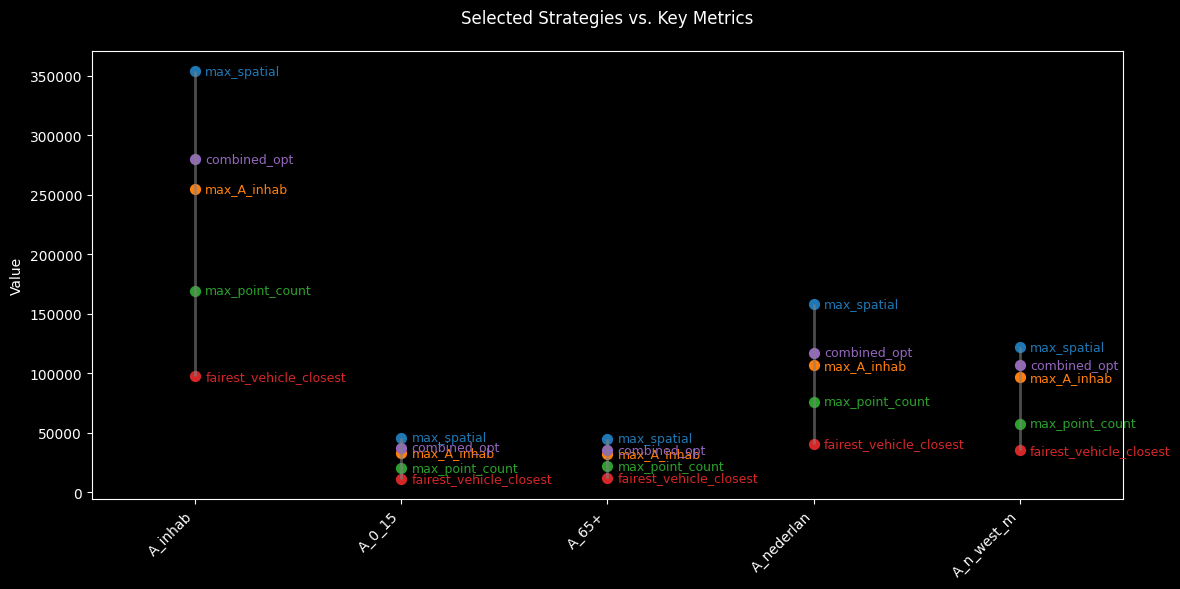

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Title: Labeled Vertical Line Plot for Selected Strategies
# # Description: Draw vertical lines for each metric and label each strategy's point directly.

# def plot_vertical_lines_labeled(df, metrics, strategies, title="Key Metrics Comparison", figsize=(12, 6)):
#     """
#     df: DataFrame with index '<metric>_uniq' rows and columns = strategies (incl. 'Amsterdam').
#     metrics: list of metric base names (without '_uniq').
#     strategies: list of column names to include.
#     """
#     plt.style.use("dark_background")
#     x = np.arange(len(metrics))

#     fig, ax = plt.subplots(figsize=figsize)

#     colors = plt.get_cmap('tab10').colors

#     for xi, metric in zip(x, metrics):
#         row = f"{metric}_uniq"
#         if row not in df.index:
#             continue
#         vals = df.loc[row, strategies].astype(float).values
#         ymin, ymax = vals.min(), vals.max()
#         ax.vlines(xi, ymin, ymax, color='gray', linewidth=2, alpha=0.6)
#         # plot and label each point
#         for si, strat in enumerate(strategies):
#             val = vals[si]
#             ax.scatter(xi, val, color=colors[si % len(colors)], s=50)
#             ax.text(xi + 0.05, val, strat, color=colors[si % len(colors)],
#                     fontsize=9, va='center')

#     ax.set_xticks(x)
#     ax.set_xticklabels(metrics, rotation=45, ha='right')
#     ax.set_ylabel("Value")
#     ax.set_title(title, pad=20)
#     ax.set_xlim(-0.5, len(metrics) - 0.5)
#     plt.tight_layout()
#     plt.show()

# # Usage:
# selected_strategies = ['max_spatial', 'max_A_inhab', 'max_point_count', 'fairest_vehicle_closest', 'combined_opt']
# key_metrics = ['A_inhab', 'A_0_15', 'A_65+', 'A_nederlan', 'A_n_west_m']

# # Call the function to plot
# plot_vertical_lines_labeled(final_df, key_metrics, selected_strategies, 
#                             title="Selected Strategies vs. Key Metrics")


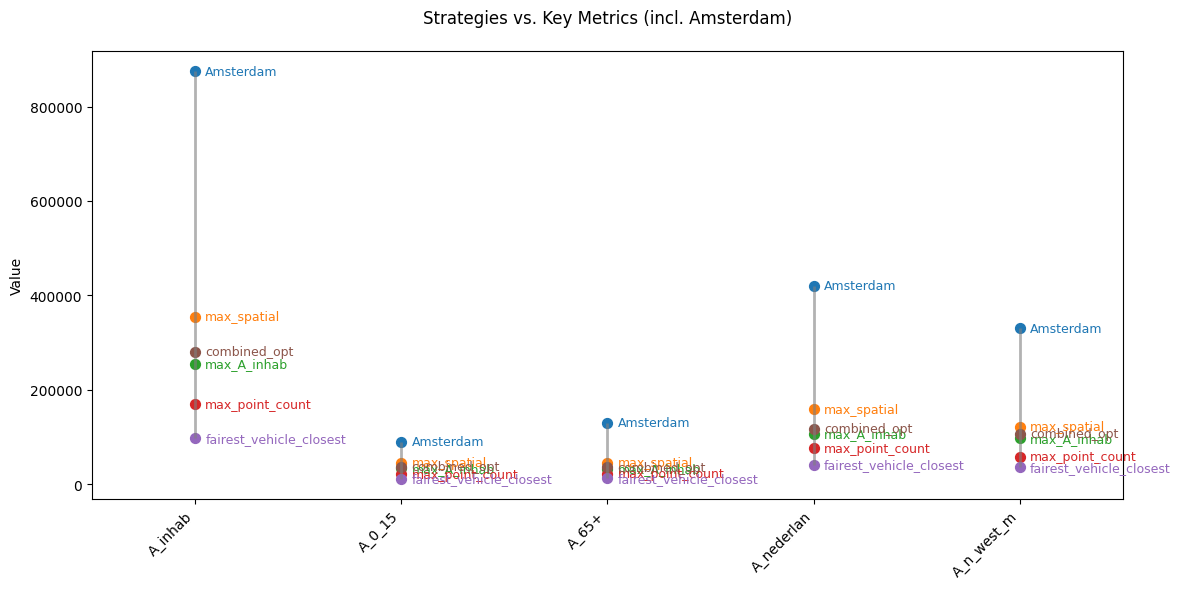

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Title: Labeled Vertical Line Plot for Selected Strategies + Amsterdam
# # Description: Draw vertical lines for each metric, label each strategy's point including 'Amsterdam'.

# def plot_vertical_lines_labeled(df, metrics, strategies, title="Key Metrics Comparison", figsize=(12, 6)):
#     """
#     df: DataFrame with index '<metric>_uniq' rows and columns = strategies (incl. 'Amsterdam').
#     metrics: list of metric base names (without '_uniq').
#     strategies: list of column names to include.
#     """
#     plt.style.use("default")
#     x = np.arange(len(metrics))

#     fig, ax = plt.subplots(figsize=figsize)

#     colors = plt.get_cmap('tab10').colors

#     for xi, metric in zip(x, metrics):
#         row = f"{metric}_uniq"
#         if row not in df.index:
#             continue
#         vals = df.loc[row, strategies].astype(float).values
#         ymin, ymax = vals.min(), vals.max()
#         ax.vlines(xi, ymin, ymax, color='gray', linewidth=2, alpha=0.6)
#         # plot and label each point
#         for si, strat in enumerate(strategies):
#             val = vals[si]
#             ax.scatter(xi, val, color=colors[si % len(colors)], s=50)
#             ax.text(xi + 0.05, val, strat, color=colors[si % len(colors)],
#                     fontsize=9, va='center')

#     ax.set_xticks(x)
#     ax.set_xticklabels(metrics, rotation=45, ha='right')
#     ax.set_ylabel("Value")
#     ax.set_title(title, pad=20)
#     ax.set_xlim(-0.5, len(metrics) - 0.5)
#     plt.tight_layout()
#     plt.show()

# # Usage:
# selected_strategies = [
#     'Amsterdam',
#     'max_spatial',
#     'max_A_inhab',
#     'max_point_count',
#     'fairest_vehicle_closest',
#     'combined_opt'
# ]
# key_metrics = ['A_inhab', 'A_0_15', 'A_65+', 'A_nederlan', 'A_n_west_m']

# plot_vertical_lines_labeled(
#     merged_df,
#     key_metrics,
#     selected_strategies,
#     title="Strategies vs. Key Metrics (incl. Amsterdam)"
# )


### EXPORT final list - most important


In [139]:
### EXPORT final list - most important
#final_df.to_csv('data/summary_vehicles_1503.csv', index=True)


## DATA VIZ FUNCTION QUICK PLOTS

In [141]:
def plot_vehicles_by_group(gdf, lists_dict, geo_boundary, color='#9EC043', alpha=0.7, markersize=0.1):
    """
    Plots subsets of vehicles based on lists_dict.
    
    Parameters:
    - gdf: GeoDataFrame of all vehicles with 'uni_id'.
    - lists_dict: dict {group_name: [uni_id, ...]}.
    - geo_boundary: GeoDataFrame for the boundary.
    - color, alpha, markersize: plotting parameters.
    """
    for group_name, ids in lists_dict.items():
        subset = gdf[gdf['uni_id'].astype(str).isin(ids)]
        ax = subset.plot(figsize=(8, 6), color=color, alpha=alpha, markersize=markersize)
        geo_boundary.boundary.plot(ax=ax, color='black', linewidth=1)
        ax.set_title(group_name, fontsize=14)
        ax.set_axis_off()
        plt.show()


In [167]:
def create_combined_vehicle_df(*dfs):
    """
    Concatenates multiple DataFrames column-wise and renames 'closest_' to 'fairest_' in columns.
    """
    combined_df = pd.concat(dfs, axis=1)
    combined_df.columns = combined_df.columns.str.replace('closest_', 'fairest_')
    return combined_df


In [142]:
# Usage example (replace with your actual GeoDataFrames):
#plot_vehicles_by_group(gdf, lists_dict, amsterdam_geo)


# FUNCTION FINAL

### INPUT DATA: CBS FULL DATA
### INPUT DATA: VEHICLES DATA for AMSTERDAM date and time
### INPUT DATA: AMS STATS 
### INPUT DATA: OPTMIZATIONS (COLUMNS) FOR RANDOM TOO 
### INPUT DATA: COMBINED DF
### OUTPUT DATA: STATS OPTIMIZATION COLUMNS

In [ ]:
# Random Function 
def select_random_vehicles(gdf, n=10, seed=None):
    df = gdf.sample(n=n, random_state=seed)[['uni_id']].reset_index(drop=True)
    df.rename(columns={'uni_id': 'random'}, inplace=True)
    return df


In [157]:
# Add data Vehicles, CBS, and city stats
cbs = gpd.read_file("data/cbs_full.shp")
gdf = gpd.read_file("data/vehicles_1503.gpkg")
ams_stats = pd.read_csv("data/cbs_stats_amsterdam.csv")

In [158]:
# Add all vehicles optmizations

max_space_vehicles = pd.read_csv('data/optimized_spatial_1503.csv') 
max_pop_vehicles = pd.read_csv('data/optimized_pop_count_1503.csv')
fair_vehicles = pd.read_csv('data/optimized_fairness_1503.csv') 
combined_vehicles = pd.read_csv('data/optimized_combined_1503.csv')
random_vehicles = select_random_vehicles(gdf, n=10)
amsterdam_geo = gpd.read_file("data/Gemeente2.geojson")


In [168]:
# Usage Analysis
gdf_p = calculate_percentages_from_vehicles(gdf)
combined_df = create_combined_vehicle_df(max_space_vehicles, max_pop_vehicles, fair_vehicles, combined_vehicles, random_vehicles)
lists_dict = extract_string_lists(combined_df)
summary_df_1 = compute_and_export_sums(gdf_p, lists_dict)
summary_df_2 = compute_cbs_summaries(gdf_p,cbs,lists_dict)
merged_df = compute_and_merge_summaries(summary_df_1,summary_df_2,gdf_p,lists_dict)
euclidean_df = add_euclidean_distances(merged_df, ams_stats)
trams_buses_df = add_bus_tram_counts(gdf_p, lists_dict, euclidean_df)
final_df = add_unique_route_counts(gdf_p, lists_dict, trams_buses_df)
final_df_city = add_city_column(final_df, ams_stats, cbs, gdf_p)
final_df_cells = add_cells_unique_counts(final_df_city, gdf_p, lists_dict)

In [172]:
def vehicle_optimization_pipeline(
    gdf,
    cbs,
    ams_stats,
    max_space_vehicles,
    max_pop_vehicles,
    fair_vehicles,
    combined_vehicles,
    random_vehicles
):
    """
    Full pipeline for computing and comparing vehicle optimization strategies.

    Parameters:
        gdf                : GeoDataFrame of vehicles
        cbs                : GeoDataFrame of CBS grid
        ams_stats          : DataFrame of Amsterdam statistics
        max_space_vehicles : DataFrame with 'max_spatial' column
        max_pop_vehicles   : DataFrame with 'max_point_count' column
        fair_vehicles      : DataFrame with 'fairest_' columns
        combined_vehicles  : DataFrame with 'combined_opt' column
        random_vehicles    : DataFrame with 'random' column

    Returns:
        final_df_cells     : Final summary DataFrame
    """
    # Process vehicles
    gdf_p = calculate_percentages_from_vehicles(gdf)

    # Combine all strategy outputs
    combined_df = create_combined_vehicle_df(
        max_space_vehicles,
        max_pop_vehicles,
        fair_vehicles,
        combined_vehicles,
        random_vehicles
    )

    # Extract dict {strategy: [vehicle_ids]}
    lists_dict = extract_string_lists(combined_df)

    # Compute summary tables
    summary_df_1 = compute_and_export_sums(gdf_p, lists_dict)
    summary_df_2 = compute_cbs_summaries(gdf_p, cbs, lists_dict)

    # Merge and enrich
    merged_df = compute_and_merge_summaries(summary_df_1, summary_df_2, gdf_p, lists_dict)
    euclidean_df = add_euclidean_distances(merged_df, ams_stats)
    trams_buses_df = add_bus_tram_counts(gdf_p, lists_dict, euclidean_df)
    final_df = add_unique_route_counts(gdf_p, lists_dict, trams_buses_df)
    final_df_city = add_city_column(final_df, ams_stats, cbs, gdf_p)
    final_df_cells = add_cells_unique_counts(final_df_city, gdf_p, lists_dict)

    return final_df_cells


In [174]:
final_df_cells_test = vehicle_optimization_pipeline(
    gdf,
    cbs,
    ams_stats,
    max_space_vehicles,
    max_pop_vehicles,
    fair_vehicles,
    combined_vehicles,
    random_vehicles
)

In [ ]:
final_df_cells_test

,max_spatial,max_A_inhab,max_A_young,max_A_old,max_A_dutch,max_P_old,max_P_non_western,max_point_count,fairest_vehicle_absolute,fairest_vehicle_relative,fairest_vehicle_closest,combined_opt,random,Amsterdam
A_inhab,588290.00,877360.00,848330.00,875495.00,875495.00,174420.00,160995.00,284600.00,308090.00,379320.00,308555.00,553825.00,378935.00,-
A_0_15,72331.00,108842.00,110458.00,108524.00,108524.00,25535.00,23849.00,32040.00,42668.00,52607.00,42714.00,67311.00,46959.00,-
A_65+,73588.00,106029.00,99666.00,107920.00,107920.00,31171.00,20450.00,36986.00,39728.00,50448.00,39751.00,69041.00,48040.00,-
A_nederlan,261458.00,369263.00,354798.00,375962.00,375962.00,94056.00,36226.00,129732.00,134446.00,166300.00,134824.00,237277.00,157566.00,-
A_n_west_m,199819.00,324375.00,323313.00,315246.00,315246.00,49482.00,105479.00,91812.00,110215.00,137571.00,110179.00,199315.00,141149.00,-
count,95803.00,82017.00,82459.00,79085.00,79085.00,93733.00,51527.00,137550.00,85520.00,84484.00,82443.00,109390.00,84984.00,2125884
A_inhab_uniq,354045.00,255310.00,254455.00,256855.00,256855.00,44960.00,28635.00,169300.00,138240.00,186740.00,137965.00,279885.00,250440.00,870375.0
A_0_15_uniq,45549.00,33240.00,34220.00,33220.00,33220.00,6014.00,4118.00,20190.00,18334.00,25486.00,18305.00,37107.00,31714.00,122890
A_65+_uniq,44997.00,32445.00,31656.00,32752.00,32752.00,8087.00,3810.00,21861.00,18003.00,24770.00,17944.00,35279.00,32067.00,112911
A_nederlan_uniq,158066.00,106809.00,107275.00,109184.00,109184.00,23390.00,7057.00,76086.00,60732.00,82096.00,60600.00,117409.00,103513.00,381451


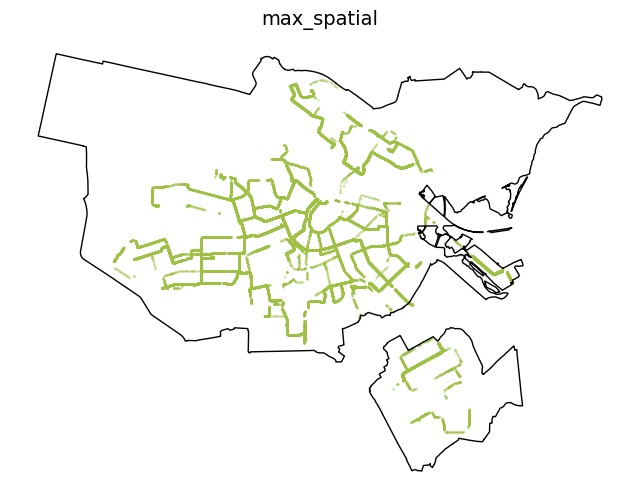

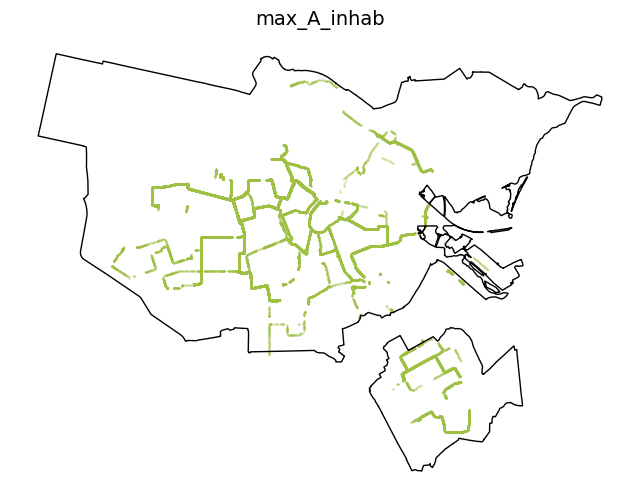

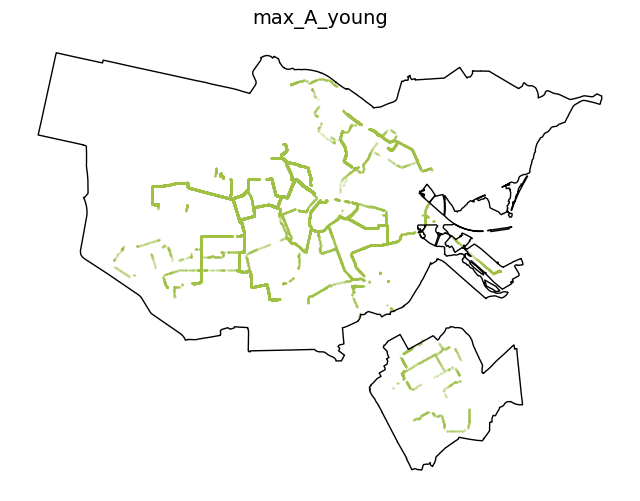

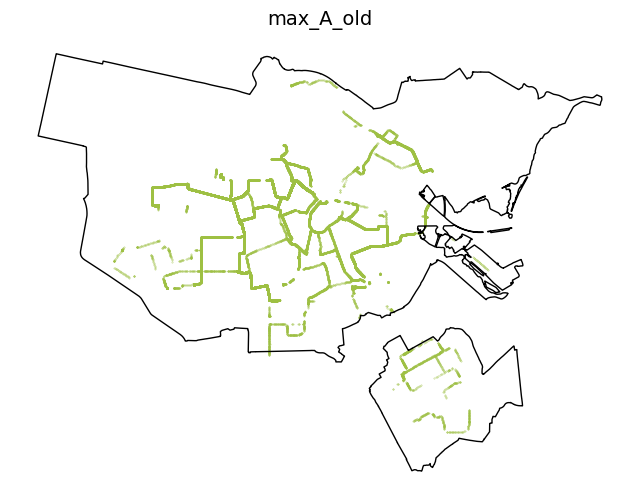

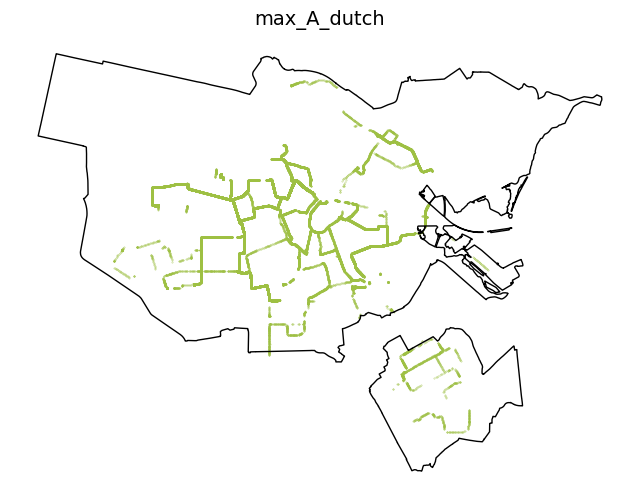

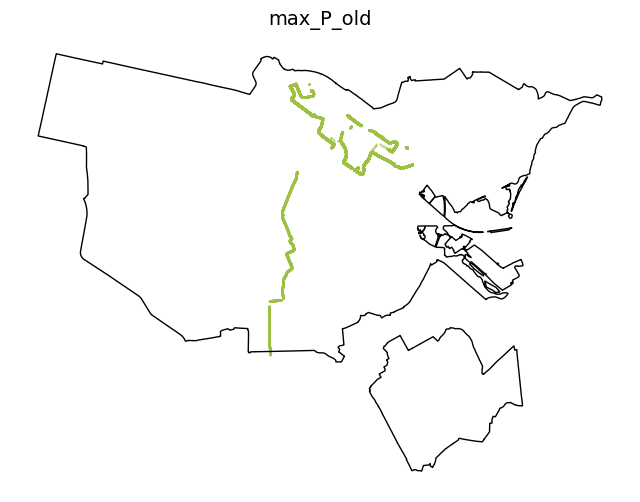

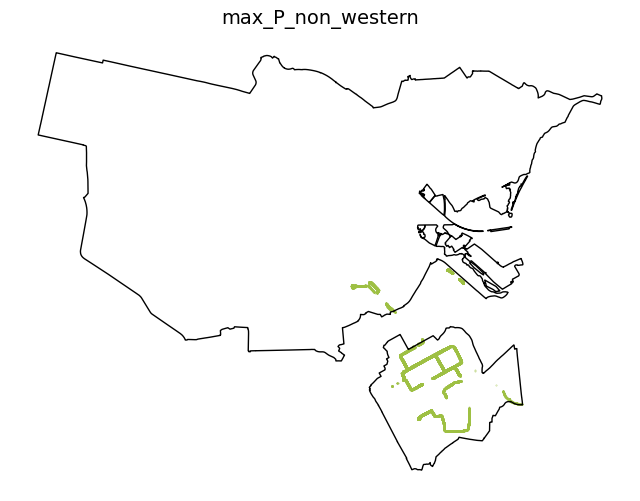

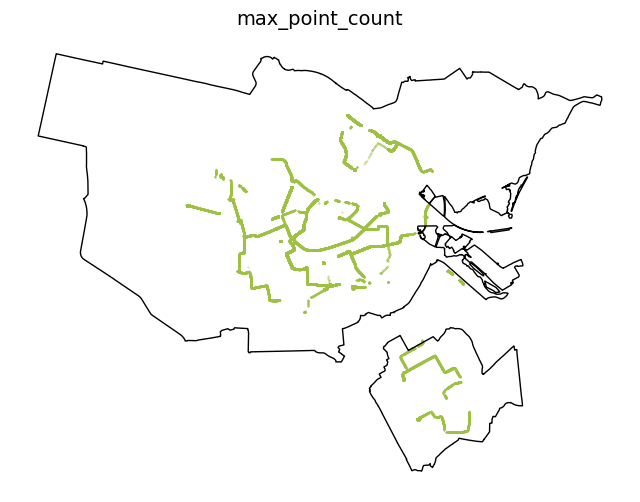

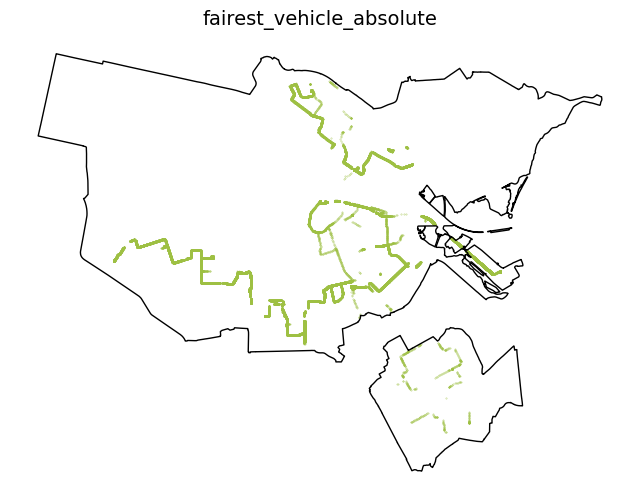

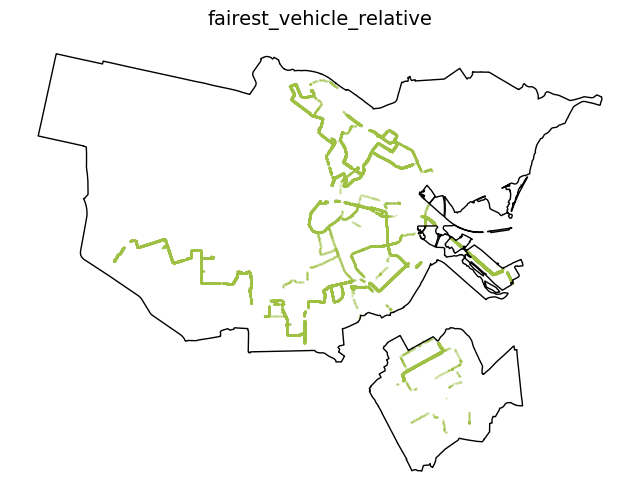

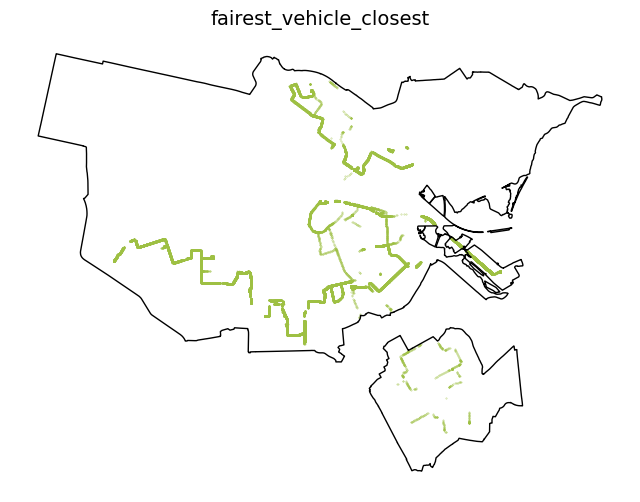

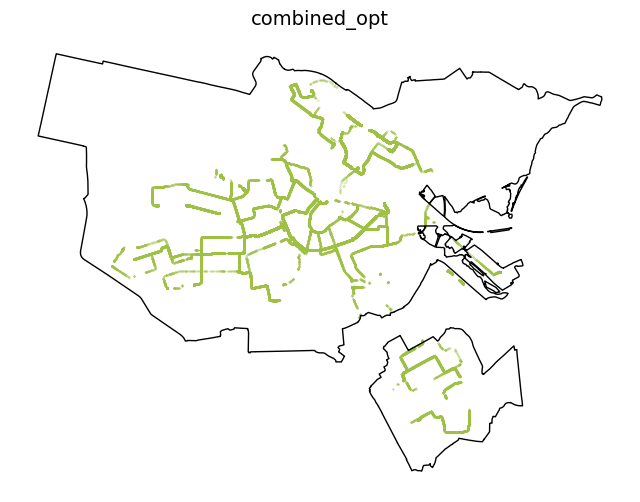

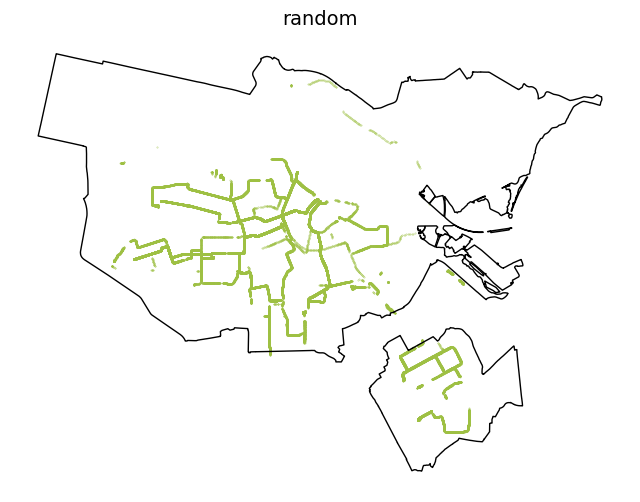

In [164]:
# Usage Visualization Quick
plot_vehicles_by_group(gdf, lists_dict, amsterdam_geo)